## A pipeline for importing Transcriptomic data to DF using Seurat 
### Sample F8_38

In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
if (FALSE) {
# For output from CellRanger < 3.0
data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38'
list.files(data_dir) # Should show barcodes.tsv, genes.tsv, and matrix.mtx
expression_matrix <- Read10X(data.dir = data_dir)
seurat_object = CreateSeuratObject(counts = expression_matrix)

# For output from CellRanger >= 3.0 with multiple data types
data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38'
list.files(data_dir) # Should show barcodes.tsv.gz, features.tsv.gz, and matrix.mtx.gz
data <- Read10X(data.dir = data_dir)
seurat_object = CreateSeuratObject(counts = data$`Gene Expression`)
seurat_object[['Protein']] = CreateAssayObject(counts = data$`Antibody Capture`)
}

### 1. Read data to a Seurat object 

In [3]:
library(dplyr)
library(Seurat)
library(patchwork)

# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38/outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




An object of class Seurat 
19595 features across 3514 samples within 1 assay 
Active assay: RNA (19595 features, 0 variable features)

### Standard pre-processing workflow

In [4]:
# pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

In [5]:
# # Visualize QC metrics as a violin plot
# VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [6]:
# plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
# plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
# plot1 + plot2

### 2. Normalizing the data

In [7]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

In [8]:
pbmc <- NormalizeData(pbmc)

### 3. Identification of highly variable features (recommended Top 2000) 

In [9]:
# pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# # Identify the 10 most highly variable genes
# top10 <- head(VariableFeatures(pbmc), 10)

# # plot variable features with and without labels
# plot1 <- VariableFeaturePlot(pbmc)
# plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
# plot2 #+ plot2

### 4. Scalind data center around zeros for all genes

In [10]:
# all.genes <- rownames(pbmc)
# pbmc <- ScaleData(pbmc, features = all.genes)

### 5. Dimensionality reduction using PCA for all genes

In [11]:
# pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

### 6. Scalind data center around zeros for top 2000 features

In [12]:
#pbmc <- ScaleData(pbmc)

In [13]:
pbmc

An object of class Seurat 
19595 features across 3514 samples within 1 assay 
Active assay: RNA (19595 features, 0 variable features)

In [14]:
# as.data.frame(Seurat::pbmc,Seurat::VariableFeatures(Seurat::pbmc))

In [15]:
# data_to_write_out <- as.data.frame(as.matrix(Seurat::pbmc))

In [16]:
var_genes <- VariableFeatures(pbmc)
seurat_df <- as.data.frame(GetAssayData(pbmc))#[var_genes,]

In [17]:
dim(seurat_df)

[1] 19595  3514

## Select human genes

In [18]:
tmp3 <- seurat_df[c('LDHA', 'GREB1', 'TFF1', 'FASN', 'MKI67','PCNA'),]

seurat_df2 <- t(tmp3) # transpose 

In [19]:
seurat_df2 = as.data.frame(seurat_df2)

In [20]:
seurat_df2$barcode <- row.names(seurat_df2)

In [21]:
head(seurat_df2, 5)

,LDHA,GREB1,TFF1,FASN,MKI67,PCNA,barcode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAACAAGTATCTCCCA-1,0.0000000,0.0000000,4.612079,1.268703,0.0000000,0.0000000,AAACAAGTATCTCCCA-1
AAACACCAATAACTGC-1,1.7944920,1.0382081,4.776244,1.318076,1.1879013,0.6481895,AAACACCAATAACTGC-1
AAACAGAGCGACTCCT-1,1.4403489,0.5908609,3.898584,1.440349,0.5908609,0.5908609,AAACAGAGCGACTCCT-1
AAACAGCTTTCAGAAG-1,1.2841372,0.0000000,4.530203,1.886491,0.7510556,1.2841372,AAACAGCTTTCAGAAG-1
AAACAGGGTCTATATT-1,0.9217402,0.3209344,4.494788,2.450628,0.9217402,0.0000000,AAACAGGGTCTATATT-1


### Read and attach coordinates 

In [22]:
data <- read.csv("/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38/outs/spatial/tissue_positions.csv")

In [23]:
total <- merge(seurat_df2, data, by = "barcode")

In [24]:
head(total, 5)

,barcode,LDHA,GREB1,TFF1,FASN,MKI67,PCNA,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,AAACAAGTATCTCCCA-1,0.0000000,0.0000000,4.612079,1.268703,0.0000000,0.0000000,1,50,102,1459,1721
2,AAACACCAATAACTGC-1,1.7944920,1.0382081,4.776244,1.318076,1.1879013,0.6481895,1,59,19,1679,570
3,AAACAGAGCGACTCCT-1,1.4403489,0.5908609,3.898584,1.440349,0.5908609,0.5908609,1,14,94,589,1608
4,AAACAGCTTTCAGAAG-1,1.2841372,0.0000000,4.530203,1.886491,0.7510556,1.2841372,1,43,9,1293,430
5,AAACAGGGTCTATATT-1,0.9217402,0.3209344,4.494788,2.450628,0.9217402,0.0000000,1,47,13,1389,486


In [25]:
library(lattice)

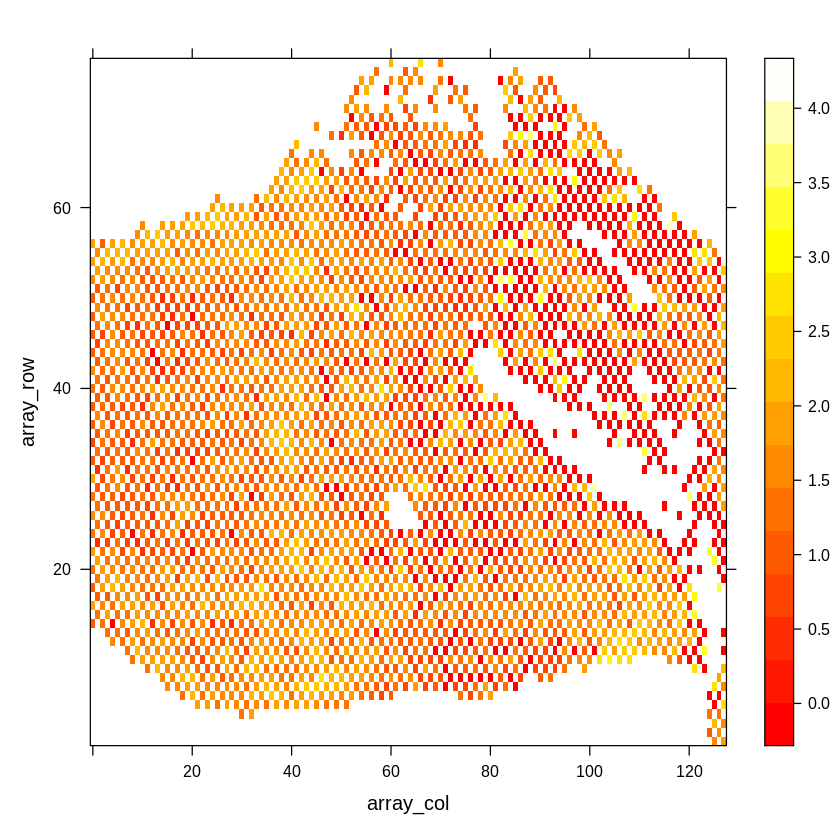

In [26]:
#image(xtabs(LDHA~array_col+array_row, total))
levelplot(LDHA~array_col+array_row, data=total, col.regions=heat.colors(100))

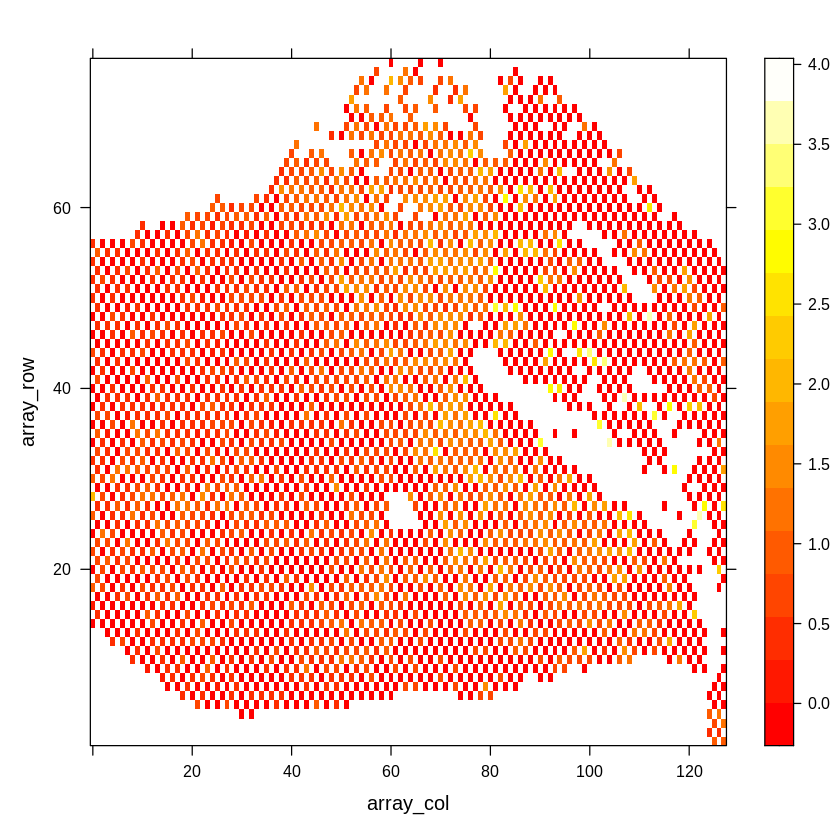

In [27]:
levelplot(GREB1~array_col+array_row, data=total, col.regions=heat.colors(100))
#image(xtabs(GREB1~array_col+array_row, total))

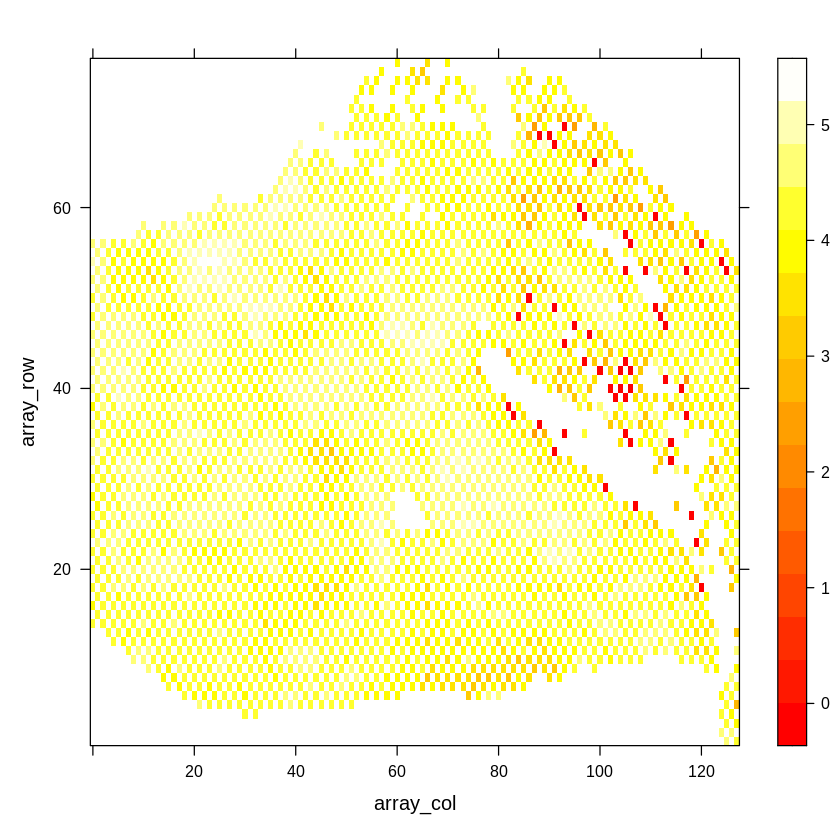

In [28]:
levelplot(TFF1~array_col+array_row, data=total, col.regions=heat.colors(100))
#image(xtabs(TFF1~array_col+array_row, total))

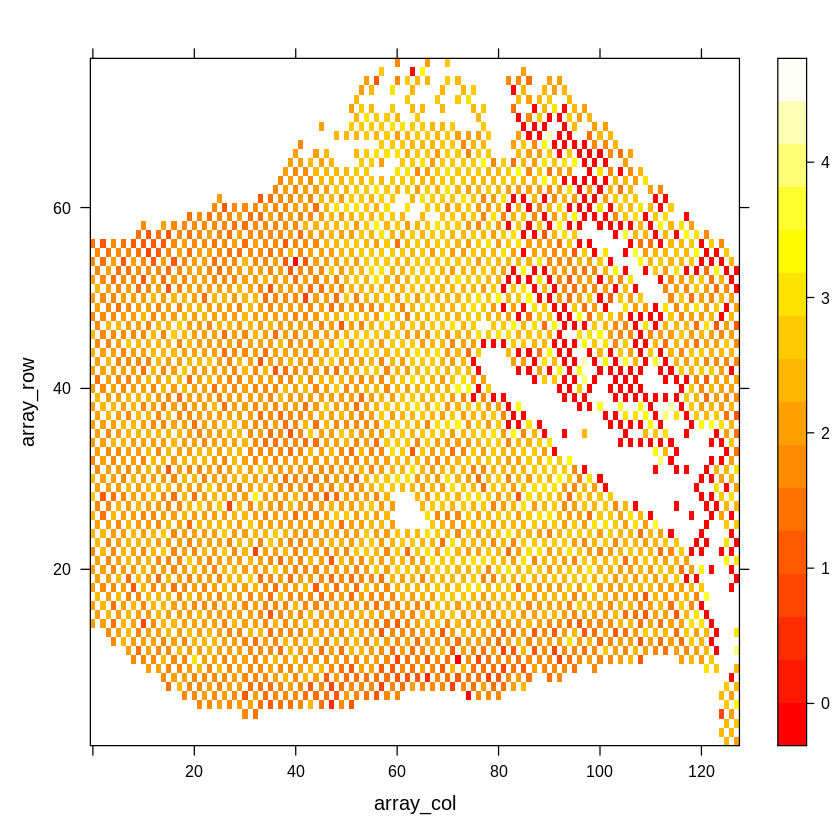

In [29]:
levelplot(FASN~array_col+array_row, data=total, col.regions=heat.colors(100))

### Save to a csv file

In [30]:
write.csv(total,"f838.csv", row.names = FALSE)